# Soil Contamination

In [1]:
#import packages
import csv
import numpy as np
import random
import pandas as pd
from sklearn import datasets, svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns


ModuleNotFoundError: No module named 'sklearn'

Read the Dataset

In [2]:
dataset=pd.read_csv("dataset.csv")
dataset

,Calcium_content,Phosphorus_content,pH_value,SOC_value,Sand_value,Soil_type
0,-0.3,0.0,-1.1,0.4,1.3,1
1,-0.2,-0.2,-0.3,0.1,2.1,1
2,-0.4,0.0,-0.7,-0.3,2.2,1
3,-0.3,-0.2,-0.8,0.1,1.4,1
4,0.0,0.2,0.0,0.6,0.6,1
...,...,...,...,...,...,...
1224,-0.3,-0.3,-0.9,3.1,-1.0,1
1225,-0.3,-0.4,-0.7,2.8,-1.0,0
1226,-0.4,-0.4,-0.4,4.4,-0.4,1
1227,-0.5,-0.4,-0.2,2.5,-0.6,0


Shape of the dataset

In [3]:
dataset.shape

(1229, 6)

In [4]:
dataset.head()

,Calcium_content,Phosphorus_content,pH_value,SOC_value,Sand_value,Soil_type
0,-0.3,0.0,-1.1,0.4,1.3,1
1,-0.2,-0.2,-0.3,0.1,2.1,1
2,-0.4,0.0,-0.7,-0.3,2.2,1
3,-0.3,-0.2,-0.8,0.1,1.4,1
4,0.0,0.2,0.0,0.6,0.6,1


In [5]:
dataset.tail()

,Calcium_content,Phosphorus_content,pH_value,SOC_value,Sand_value,Soil_type
1224,-0.3,-0.3,-0.9,3.1,-1.0,1
1225,-0.3,-0.4,-0.7,2.8,-1.0,0
1226,-0.4,-0.4,-0.4,4.4,-0.4,1
1227,-0.5,-0.4,-0.2,2.5,-0.6,0
1228,-0.2,-0.2,-0.5,4.0,-0.4,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calcium_content     1229 non-null   float64
 1   Phosphorus_content  1229 non-null   float64
 2   pH_value            1229 non-null   float64
 3   SOC_value           1229 non-null   float64
 4   Sand_value          1229 non-null   float64
 5   Soil_type           1229 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 57.7 KB


In [7]:
dataset.describe()

,Calcium_content,Phosphorus_content,pH_value,SOC_value,Sand_value,Soil_type
count,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000
mean,-0.009439,-0.029780,-0.038649,0.080228,-0.001383,0.502034
std,1.044214,0.969263,0.909404,1.148980,1.008727,0.500199
min,-0.500000,-0.400000,-1.900000,-0.900000,-1.500000,0.000000
25%,-0.500000,-0.300000,-0.700000,-0.600000,-0.900000,0.000000
50%,-0.400000,-0.300000,-0.200000,-0.400000,-0.100000,1.000000
75%,-0.100000,-0.100000,0.400000,0.300000,0.800000,1.000000
max,9.600000,13.300000,3.400000,7.600000,2.300000,1.000000


In [8]:
dataset.isnull().sum()

Calcium_content       0
Phosphorus_content    0
pH_value              0
SOC_value             0
Sand_value            0
Soil_type             0
dtype: int64

In [9]:
dataset.columns

Index(['Calcium_content', 'Phosphorus_content', 'pH_value', 'SOC_value',
       'Sand_value', 'Soil_type'],
      dtype='object')

# EDA

# Histogram 

(array([1090.,   67.,   34.,   14.,    7.,    8.,    2.,    2.,    2.,
           3.]),
 array([-0.5 ,  0.51,  1.52,  2.53,  3.54,  4.55,  5.56,  6.57,  7.58,
         8.59,  9.6 ]),
 <BarContainer object of 10 artists>)

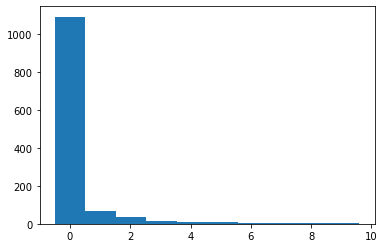

In [10]:
plt.hist(dataset.Calcium_content)

(array([1.167e+03, 3.300e+01, 1.400e+01, 7.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([-0.4 ,  0.97,  2.34,  3.71,  5.08,  6.45,  7.82,  9.19, 10.56,
        11.93, 13.3 ]),
 <BarContainer object of 10 artists>)

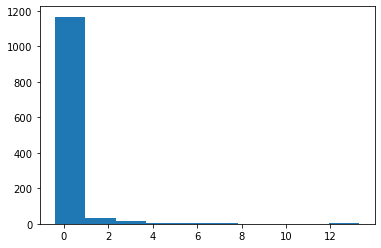

In [11]:
plt.hist(dataset.Phosphorus_content)

(array([ 31., 199., 290., 355., 155.,  52.,  76.,  62.,   8.,   1.]),
 array([-1.9 , -1.37, -0.84, -0.31,  0.22,  0.75,  1.28,  1.81,  2.34,
         2.87,  3.4 ]),
 <BarContainer object of 10 artists>)

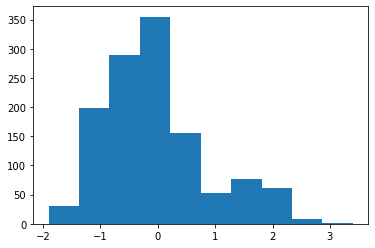

In [12]:
plt.hist(dataset.pH_value)

(array([809., 208.,  92.,  45.,  42.,  16.,  12.,   1.,   1.,   3.]),
 array([-0.9 , -0.05,  0.8 ,  1.65,  2.5 ,  3.35,  4.2 ,  5.05,  5.9 ,
         6.75,  7.6 ]),
 <BarContainer object of 10 artists>)

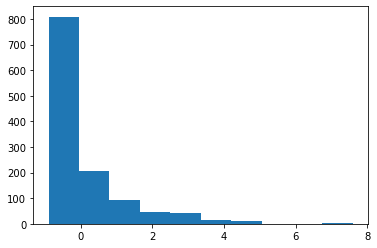

In [13]:
plt.hist(dataset.SOC_value)

(array([157., 246., 139., 147.,  91., 121., 115.,  90., 108.,  15.]),
 array([-1.5 , -1.12, -0.74, -0.36,  0.02,  0.4 ,  0.78,  1.16,  1.54,
         1.92,  2.3 ]),
 <BarContainer object of 10 artists>)

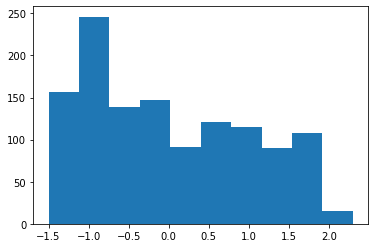

In [14]:
plt.hist(dataset.Sand_value)

# Distribution plot

D:\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


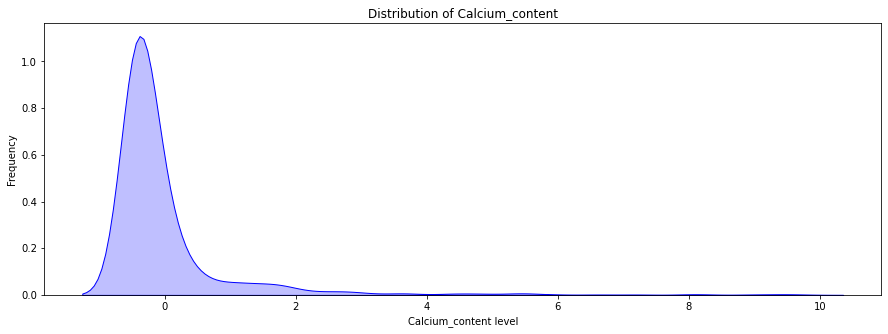

In [15]:
plt.figure(figsize=(15,5))
sns.distplot(dataset.Calcium_content, hist=False, color="b", kde_kws={"shade": True})
plt.xlabel("Calcium_content level")
plt.ylabel("Frequency")
plt.title("Distribution of Calcium_content")
plt.show()


D:\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


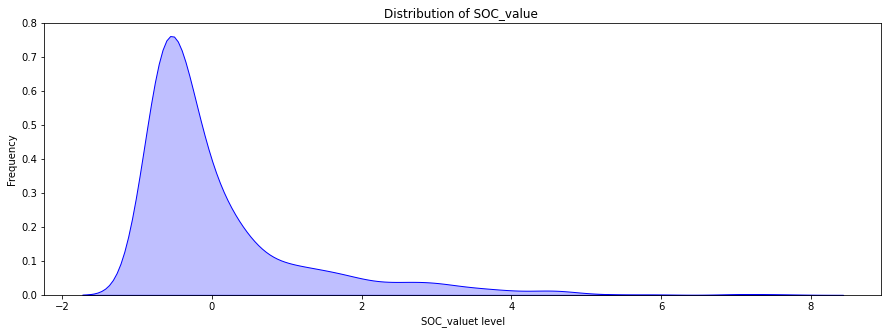

In [16]:
plt.figure(figsize=(15,5))
sns.distplot(dataset.SOC_value, hist=False, color="b", kde_kws={"shade": True})
plt.xlabel("SOC_valuet level")
plt.ylabel("Frequency")
plt.title("Distribution of SOC_value ")
plt.show()

D:\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


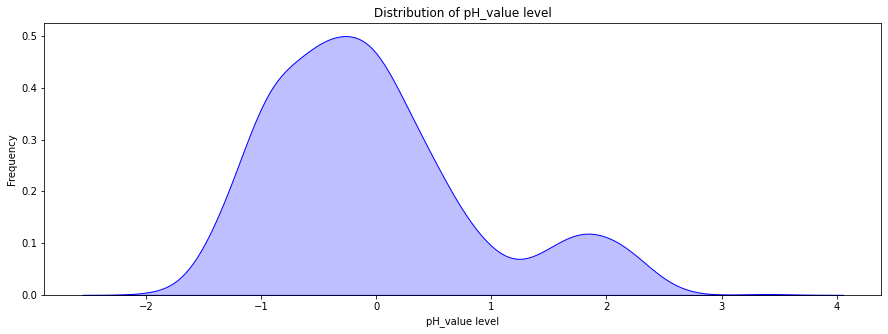

In [17]:
plt.figure(figsize=(15,5))
sns.distplot(dataset.pH_value, hist=False, color="b", kde_kws={"shade": True})
plt.xlabel("pH_value level")
plt.ylabel("Frequency")
plt.title("Distribution of pH_value level")
plt.show()

D:\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


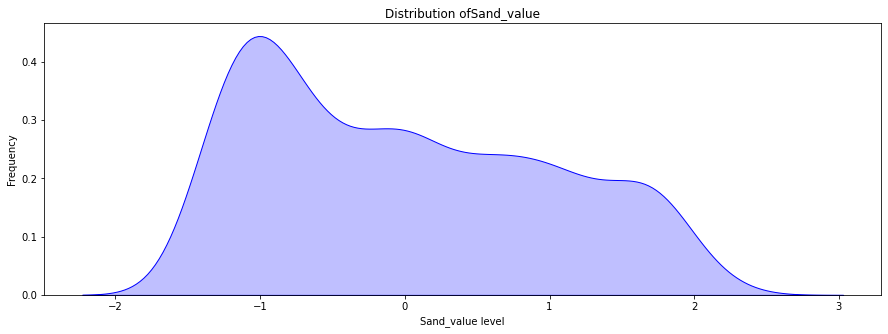

In [18]:
plt.figure(figsize=(15,5))
sns.distplot(dataset.Sand_value, hist=False, color="b", kde_kws={"shade": True})
plt.xlabel("Sand_value level")
plt.ylabel("Frequency")
plt.title("Distribution ofSand_value")
plt.show()

# Counter plot

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Soil_type', ylabel='count'>

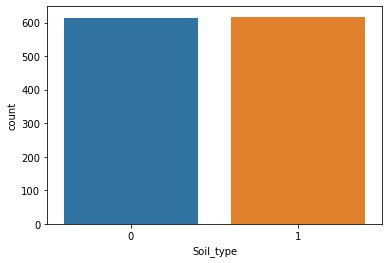

In [19]:
sns.countplot(dataset.Soil_type)

# Scatter plot

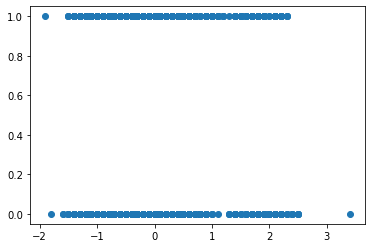

In [20]:
#Scatter plot
plt.scatter(dataset.pH_value, dataset.Soil_type)
plt.show()

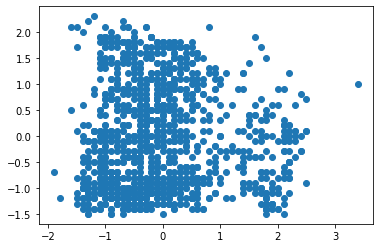

In [21]:
plt.scatter(dataset.pH_value,dataset.Sand_value)
plt.show()

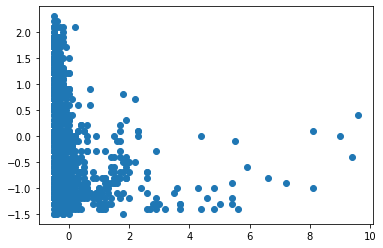

In [22]:
plt.scatter(dataset.Calcium_content,dataset.Sand_value)
plt.show()

# Model Implementation

# Naive Bayies Algorithm

In [23]:
X = dataset[['Calcium_content', 'Phosphorus_content', 'pH_value', 'SOC_value', 'Sand_value']].values
y = dataset[['Soil_type']].values

In [24]:
X.shape

(1229, 5)

In [25]:
y.shape

(1229, 1)

model splitting 70-30

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Splitting Train-set and Test-set
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=41)

# Splitting Train-set and Validation-set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=41)

In [27]:
from sklearn.naive_bayes import GaussianNB
def get_accuracy(y_true, y_preds):
    true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_true, y_preds).ravel()
    accuracy = (true_positive + true_negative)/(true_negative + false_positive + false_negative + true_positive)
    return accuracy

In [28]:
naive_b = GaussianNB()
naive_b.fit(X_train, y_train)

D:\python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [29]:
from sklearn.metrics import confusion_matrix

models = [naive_b]
acc = []
for model in models:
    preds_val = model.predict(X_val)
    accuracy = get_accuracy(y_val, preds_val)
    acc.append(accuracy)
    
    
model_name = ['Naive Bayes Accuracy']
accuracy = dict(zip(model_name, acc))
print(accuracy)

{'Naive Bayes Accuracy': 0.6093023255813953}


Model splitting 80-20

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Splitting Train-set and Test-set
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=41)

# Splitting Train-set and Validation-set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=41)

In [31]:
from sklearn.naive_bayes import GaussianNB
def get_accuracy(y_true, y_preds):
    true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_true, y_preds).ravel()
    accuracy = (true_positive + true_negative)/(true_negative + false_positive + false_negative + true_positive)
    return accuracy

In [32]:
naive_b1 = GaussianNB()
naive_b1.fit(X_train, y_train)

D:\python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [33]:
from sklearn.metrics import confusion_matrix

models = [naive_b1]
acc = []
for model in models:
    preds_val = model.predict(X_val)
    accuracy = get_accuracy(y_val, preds_val)
    acc.append(accuracy)
    
    
model_name = ['Naive Bayes']
accuracy = dict(zip(model_name, acc))
print(accuracy)

{'Naive Bayes': 0.5447154471544715}


In [34]:
preds_val

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1], dtype=int64)

In [35]:
from sklearn.metrics import confusion_matrix

models = [naive_b,naive_b1]
acc = []
for model in models:
    preds_val = model.predict(X_val)
    accuracy = get_accuracy(y_val, preds_val)
    acc.append(accuracy)
    
    
model_name = ['70-30','80-20']
accuracy = dict(zip(model_name, acc))
print(accuracy)

{'70-30': 0.6138211382113821, '80-20': 0.5447154471544715}


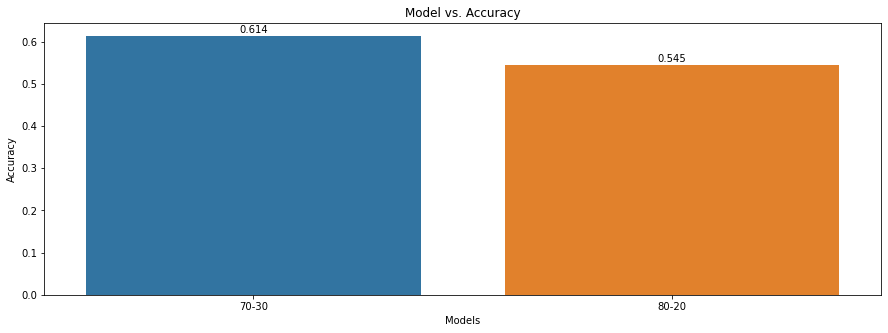

In [36]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x = list(accuracy.keys()), y = list(accuracy.values()))
for p, value in zip(ax.patches, list(accuracy.values())):
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + 0.008
    ax.text(_x, _y, round(value, 3), ha="center") 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model vs. Accuracy")
plt.show()

# SVM Algorithm

In [37]:
x, y = X_train, y_train

clf_predict = svm.SVC(C=7120.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=6.191, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

clf_predict.fit(x, y) 

print("\n",clf_predict.predict(X_test[0:]))
print("\nAccuracy SVM : "+ str(round(accuracy_score(clf_predict.predict(X_test[0:]), y_test[0:])*100, 1)) + " %")



 [0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0
 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0
 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1]

Accuracy SVM : 61.8 %


D:\python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# confusion matrix

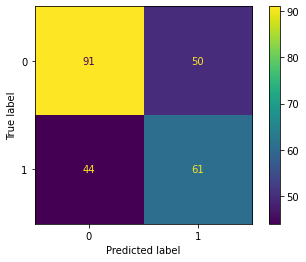

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_predict, X_test, y_test)  
plt.show()  

# prediction

In [39]:
while True:
    
    data_soil = []
    data_soil1 = []
    Calcium = float(input("\n Enter calcium content: "))
    data_soil.append(Calcium)
    Phosphorus = float(input("\n Enter phosphorus content: "))
    data_soil.append(Phosphorus)
    ph = float(input("\n Enter pH value: "))
    data_soil.append(ph)
    soc  = float(input("\n Enter soc value: "))
    data_soil.append(soc)
    sand = float(input("\n Enter sand value: "))
    data_soil.append(sand)
    data_soil1.append(data_soil)


    if(clf_predict.predict(data_soil1[0:]) == '0'):
        print(clf_predict.predict(data_soil1[0:]))  
    else:
        print(clf_predict.predict(data_soil1[0:]))      
    break

Enter calcium content: 3
Enter phosphorus content: 3
Enter pH value: 0.2
Enter soc value: -0.3
Enter sand value: 0.5
[0]


<ipython-input-39-fb50565f3ebb>:18: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if(clf_predict.predict(data_soil1[0:]) == '0'):
